# Scores and Visuals

In [9]:
import json
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, f1_score, recall_score, precision_score

In [10]:
comparison_filepath = 'data/comparison.json'

In [11]:
with open(comparison_filepath, 'r') as f:
        ent_eval = json.load(f)
len(ent_eval.items())

3

In [12]:
from collections import defaultdict

ref_df = dict(docname=[],entname=[])
pred_df = dict(docname=[],entname=[])

for dir_n,ent_eval in ent_evals.items():
    for docname,entities in ent_eval.items():
        ref_df['docname'].append(docname)
        pred_df['docname'].append(docname)
        
        for entname,pairs_n_scores in entities.items():
            pred_df['entname'].append(entname)
            ref_df['entname'].append(entname)
            try:
                for pair in pairs_n_scores['pairs']:
                    try:
                        for a,v in pair['ref'].items():
                            if a not in ref_df.keys():
                                ref_df[a] = []
                            ref_df[a].append(v)
                    except AttributeError:
                        pass
                    try:
                        for a,v in pair['pred'].items():
                            if a not in ref_df.keys():
                                pred_df[a] = []
                            pred_df[a].append(v)
                    except AttributeError:
                        pass
                    sizes = []
                    for k in ref_df.keys():
                        sizes.append(len(ref_df[k]))
                    for k in ref_df.keys():
                        if len(ref_df[k]) < max(sizes):
                            ref_df[k].extend([math.nan]*(max(sizes) - len(ref_df[k])))
                    sizes = []
                    for k in pred_df.keys():
                        sizes.append(len(pred_df[k]))
                    for k in pred_df.keys():
                        if len(pred_df[k]) < max(sizes):
                            pred_df[k].extend([math.nan]*(max(sizes) - len(pred_df[k])))
                    
            except:
                pass

AttributeError: 'float' object has no attribute 'items'

In [ ]:
# df = pd.json_normalize(list(ent_evals.values()))
# df.index = ent_evals.keys()
# df.drop(['global'], axis=0, inplace=True)
# df.head()

# Scores

### Dummy data
Create dummy data to be visualised using sklearn tools.

In [ ]:
dummies = {'False Positive': (0,1),
            'False Negative': (1,0),
            'True Positive': (1,1),
            'True Negative': (0,0),
            }

dummies_inv = {v: k for k, v in dummies.items()}

In [ ]:
def create_dummy(data):
    dummy_data = []
    for docname,entities in data.items():
        if (type(entities) is float) or (type(entities) is list):
            continue
        for entname,pairs_n_scores in entities.items():
            if (type(pairs_n_scores) is float) or (type(pairs_n_scores) is list):
                continue
            for pair in pairs_n_scores['pairs']:
                label = pair['cat']
                dummy_data.append(dummies[label])

    dummy_df = pd.DataFrame(dummy_data, columns =['ref', 'pred'])
    
    return dummy_df

In [ ]:
dummies_df = dict()
for k,ent_eval in ent_evals.items():
    dummies_df[k] = create_dummy(ent_evals)

dummies_df['2012_Ozgen_Psyllids_Anatolie']


NameError: name 'create_dummy' is not defined

In [ ]:
for k,dummy_df in dummies_df.items():
    ref_dummy, pred_dummy = dummy_df['ref'], dummy_df['pred']
    dummies_df[k]=list(zip(ref_dummy, pred_dummy))

dummies_df

{'2012_Ozgen_Psyllids_Anatolie': [(1, 0),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (1, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (1, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (1, 0),
  (0, 1),
  (0, 1),
  (0, 1),
  (1, 0),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (1, 0),
  (0, 1)],
 'global': [(1, 0),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (0, 1),
  (1, 1),
  (0, 1),
  (0, 1),
  (0, 1

In [ ]:
dummies_df.keys()


dict_keys(['2012_Ozgen_Psyllids_Anatolie', 'global', '1919_Horwood_blackthorn_Cacopsylla_pruni_UK'])

### Plot Confusion Matrix

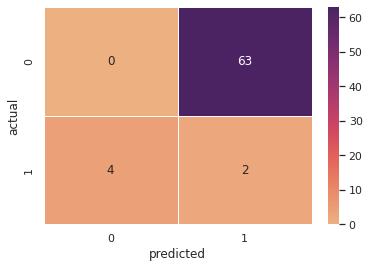

In [ ]:
# plotting confusion matrix
conf_mat = confusion_matrix(ref_dummy, pred_dummy)
sns.set(font_scale=1)
matrix = sns.heatmap(conf_mat, annot=True, fmt='d', linewidths=.5, cmap='flare')
matrix.set(xlabel='predicted', ylabel='actual')
matrix.figure.savefig("data/evaluation_results/confusion_matrix.png") 

In [ ]:
print(classification_report(ref_dummy, pred_dummy))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.03      0.33      0.06         6

    accuracy                           0.03        69
   macro avg       0.02      0.17      0.03        69
weighted avg       0.00      0.03      0.00        69



In [ ]:
with open(comparison_filepath, 'r') as f:
    df = pd.read_json(f)

In [ ]:
df.head()

,2012_Ozgen_Psyllids_Anatolie,global,1919_Horwood_blackthorn_Cacopsylla_pruni_UK
vector,"{'pairs': [{'ref': {'phylum': 'Arthropoda', 'c...",NaN,"{'pairs': [{'ref': {'phylum': 'Arthropoda', 'c..."
location,"{'pairs': [{'ref': {'country': 'Turkey', 'coun...",NaN,{'pairs': [{'ref': {'country': 'United Kingdom...
host,"{'pairs': [], 'recall': None, 'precision': Non...",NaN,"{'pairs': [{'ref': None, 'pred': {'DOC': '1919..."
date,"{'pairs': [{'ref': {'eventDate': '2012', 'type...",NaN,"{'pairs': [{'ref': {'eventDate': '1852', 'type..."
recall,NaN,0.001263,NaN


# Visualisation

In [ ]:
from collections import Counter
from tools.visual import plot

In [ ]:
counts =dict()

for k,dummy_df in dummies_df.items():
    counts[k] = dict(Counter(dummy_df))
counts


{'2012_Ozgen_Psyllids_Anatolie': {(1, 0): 4, (0, 1): 63, (1, 1): 2},
 'global': {(1, 0): 4, (0, 1): 63, (1, 1): 2},
 '1919_Horwood_blackthorn_Cacopsylla_pruni_UK': {(1, 0): 4,
  (0, 1): 63,
  (1, 1): 2}}

In [ ]:
df = pd.DataFrame([count.values() for count in counts.values()],columns=[dummies_inv[k] for k in counts[0].keys()])
#df = df.reset_index()
df

rows = []
for col_name in df.columns:
    col = df[col_name]
    for i in df.index:
        rows.append((i,col_name,df[col_name].iloc[i]))

df = pd.DataFrame(rows, columns=['i','cat','val'])
df

KeyError: '2012_Ozgen_Psyllids_Anatolie'

In [ ]:
save_dir = 'data/evaluation_results/'

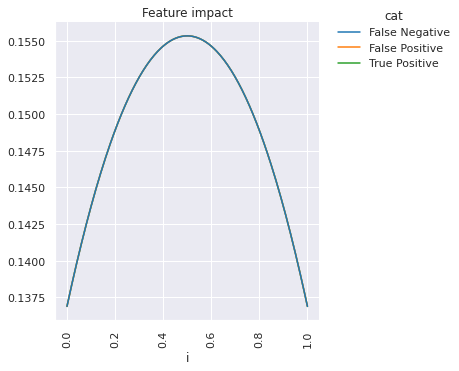

In [ ]:
x = 'i'
hue = 'cat'
palette = sns.color_palette('tab10',n_colors=2)

plot(x=x, hue=hue, data=df,
    title = 'Feature impact' ,
    type='dist',
    save_dir = save_dir,
    )

matrix.figure.savefig("data/evaluation_results/confusion_matrix.png") 